In [5]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

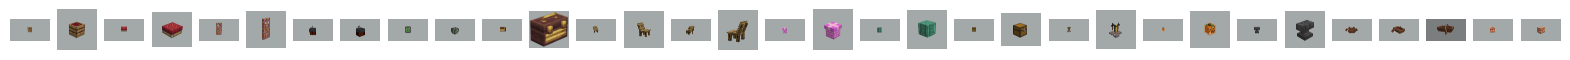

In [27]:

#test scene
test_scene = cv2.imread("../Scenes/S6.png")
test_scene = cv2.cvtColor(test_scene, cv2.COLOR_BGR2RGB)

# load in all of the images
test_training_objects = []

# use os to get all of the files in the directory
for file in os.listdir("../Objects/"):
  # read in the image
  img = cv2.imread("../Objects/" + file)
  # convert to grayscale
  colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # append to the list
  test_training_objects.append(colored)
  
test_training_objects


# plot the images
plt.figure(figsize=(20, 20))
for i in range(len(test_training_objects)):
  plt.subplot(1, len(test_training_objects), i+1)
  plt.axis('off')
  plt.imshow(test_training_objects[i])

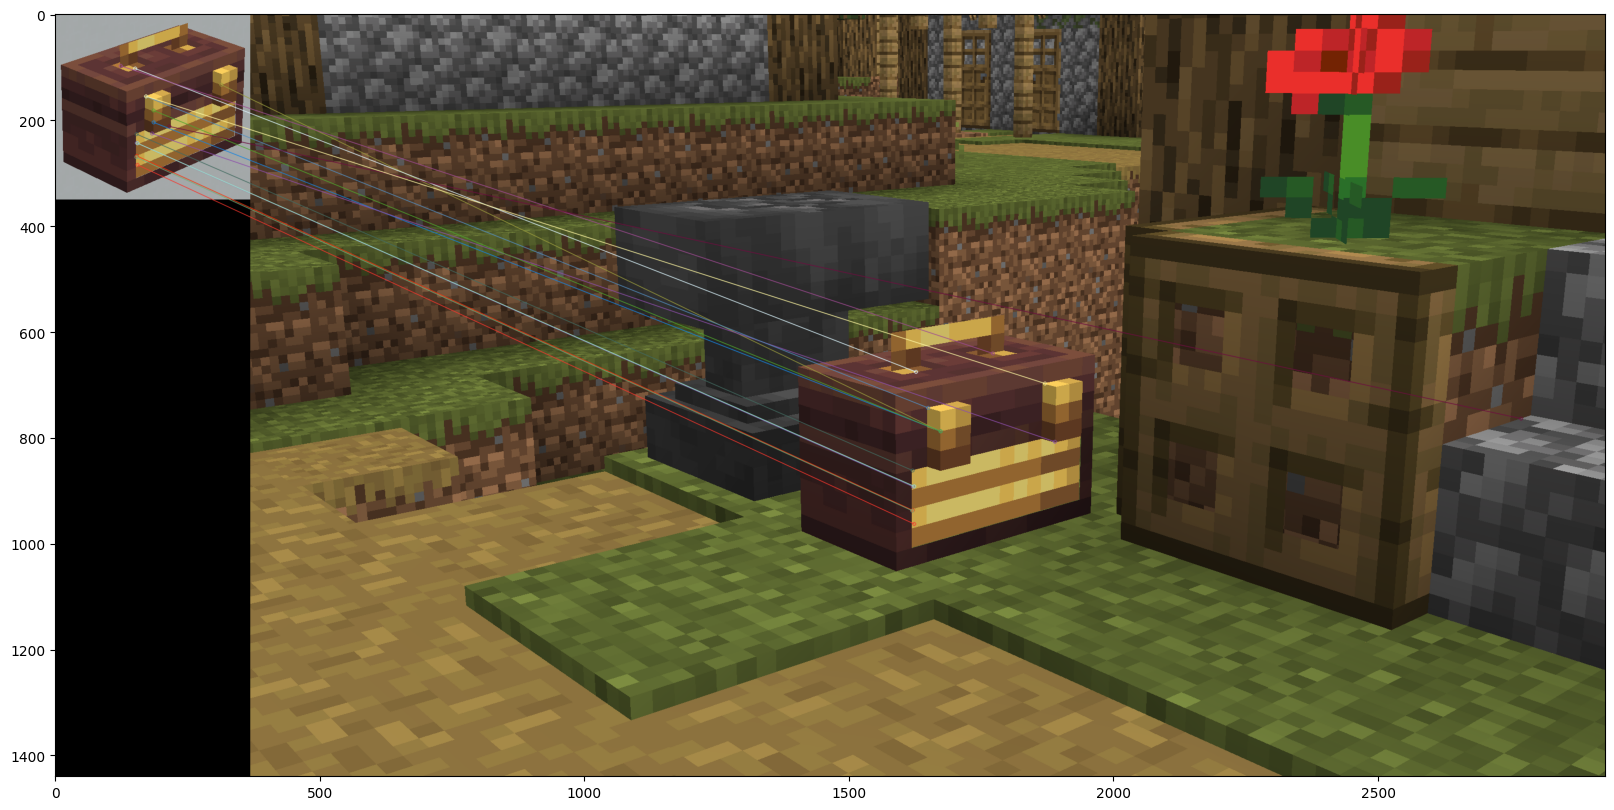

In [36]:
#create ORB
orb = cv2.ORB_create()
train_object = test_training_objects[11]

keypoint, descriptors = orb.detectAndCompute(train_object, None)
keypoint2, descriptors2 = orb.detectAndCompute(test_scene, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors, descriptors2, k=2)

#apply funny ratio 
good_results = []

for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_results.append([m])



#grab the top 100 matches as per article
img3 = cv2.drawMatchesKnn(train_object, keypoint, test_scene, keypoint2, good_results[:100], None, flags=2)

# draw box around detected image


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()
 